<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-the-TF-workbench-ready" data-toc-modified-id="Getting-the-TF-workbench-ready-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting the TF workbench ready</a></span></li><li><span><a href="#The-Texts-in-SHEBANQ" data-toc-modified-id="The-Texts-in-SHEBANQ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>The Texts</code> in SHEBANQ</a></span><ul class="toc-item"><li><span><a href="#Searching-WayX-clauses" data-toc-modified-id="Searching-WayX-clauses-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Searching WayX clauses</a></span></li><li><span><a href="#Searching-for-proper-names-in-Gen-20" data-toc-modified-id="Searching-for-proper-names-in-Gen-20-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Searching for proper names in Gen 20</a></span></li></ul></li><li><span><a href="#ETCBC-database-structure" data-toc-modified-id="ETCBC-database-structure-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ETCBC database structure</a></span><ul class="toc-item"><li><span><a href="#general-overview" data-toc-modified-id="general-overview-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>general overview</a></span></li><li><span><a href="#Closer-Look-into-the-database" data-toc-modified-id="Closer-Look-into-the-database-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Closer Look into the database</a></span></li><li><span><a href="#Where-are-the-Codes?" data-toc-modified-id="Where-are-the-Codes?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Where are the Codes?</a></span></li></ul></li><li><span><a href="#Searching-for-Verbal-Valence" data-toc-modified-id="Searching-for-Verbal-Valence-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Searching for Verbal Valence</a></span></li><li><span><a href="#Assignments" data-toc-modified-id="Assignments-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Assignments</a></span></li><li><span><a href="#Whats-Next?:-Complex-Query-building-with-Relational-Operators" data-toc-modified-id="Whats-Next?:-Complex-Query-building-with-Relational-Operators-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Whats Next?: Complex Query building with Relational Operators</a></span></li></ul></div>

# Getting the TF workbench ready
The first thing we need to do in our jupyter notebook is to
1. load the TF program
2. load the TF database

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

In [3]:
# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [5]:
# Now we load the TF bhsa database
OT = use('etcbc/bhsa', version='2021', mod='CenterBLC/BHSaddons/tf')

This is Text-Fabric 9.3.1
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

131 features found and 1 ignored



# `The Texts` in SHEBANQ
Lets pull up Gen 20 in SHEBANQ. Do the following:
1. Go to https://shebanq.ancient-data.org/ 
2. Click on "Text" in the upper left corner
3. Maneuver to Gen 20
4. Visualize the text-grammatical structure of Gen 20 by clicking on the "Notes (1/3)" button until it shows "Syntax (2/3)". You should see something like this:
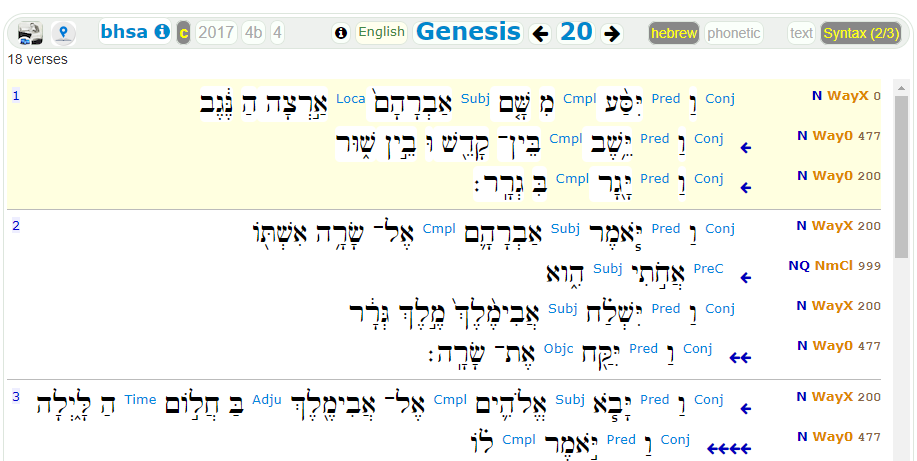

5. Study the codes and make sense out of them.

## Searching WayX clauses
Obviously `WayX` clauses are those clauses that are built by Wayyiqtol verbal forms followed by an explicit subject (marked by "X"). Lets search for those WayX clauses in Gen 20.

In [6]:
WayXinGen20 = '''
verse book=Genesis chapter=20
    clause typ=WayX
'''
WayXinGen20  = OT.search(WayXinGen20)
OT.table(WayXinGen20, start=1, end=5, condensed=False, colorMap={2: 'magenta'})

  0.12s 15 results


n,p,verse,clause
1,Genesis 20:1,,וַיִּסַּ֨ע מִשָּׁ֤ם אַבְרָהָם֙ אַ֣רְצָה הַנֶּ֔גֶב
2,Genesis 20:2,,וַיֹּ֧אמֶר אַבְרָהָ֛ם אֶל־שָׂרָ֥ה אִשְׁתֹּ֖ו
3,Genesis 20:2,,וַיִּשְׁלַ֗ח אֲבִימֶ֨לֶךְ֙ מֶ֣לֶךְ גְּרָ֔ר
4,Genesis 20:3,,וַיָּבֹ֧א אֱלֹהִ֛ים אֶל־אֲבִימֶ֖לֶךְ בַּחֲלֹ֣ום הַלָּ֑יְלָה
5,Genesis 20:6,,וַיֹּאמֶר֩ אֵלָ֨יו הָֽאֱלֹהִ֜ים בַּחֲלֹ֗ם


## Searching for proper names in Gen 20
Who are the participants in our text? Lets look for `nmpr` (nominal proper names). A complete list of part of speech (`sp`) can be found here: https://etcbc.github.io/bhsa/features/sp/

code|description
---|---
`art`  |article
`verb` |verb
`subs` |noun
`nmpr` |proper noun
`advb` |adverb
`prep` |preposition
`conj` |conjunction
`prps` |personal pronoun
`prde` |demonstrative pronoun
`prin` |interrogative pronoun
`intj` |interjection
`nega` |negative particle
`inrg` |interrogative particle
`adjv` |adjective

In [7]:
ProperNames = '''
verse book=Genesis chapter=20
    word sp=nmpr
'''
ProperNames  = OT.search(ProperNames)
OT.table(ProperNames, start=1, end=29, condensed=False, colorMap={2: 'lime'})

  0.47s 29 results


n,p,verse,word
1,Genesis 20:1,,אַבְרָהָם֙
2,Genesis 20:1,,קָדֵ֖שׁ
3,Genesis 20:1,,שׁ֑וּר
4,Genesis 20:1,,גְרָֽר׃
5,Genesis 20:2,,אַבְרָהָ֛ם
6,Genesis 20:2,,שָׂרָ֥ה
7,Genesis 20:2,,אֲבִימֶ֨לֶךְ֙
8,Genesis 20:2,,גְּרָ֔ר
9,Genesis 20:2,,שָׂרָֽה׃
10,Genesis 20:3,,אֲבִימֶ֖לֶךְ


In [8]:
# Task 1
# search for the explicit subjects in those WayX clauses
# in order to find the right code for phrase functions go here: https://etcbc.github.io/bhsa/features/function/
explicitSubjects = '''
verse book=Genesis chapter=20
    clause typ=WayX
        phrase function=Subj
          word sp=nmpr
'''
explicitSubjects  = OT.search(explicitSubjects)
OT.table(explicitSubjects, start=1, end=10, condensed=False, colorMap={2: 'magenta', 3: 'red', 4: 'yellow'})


  0.94s 11 results


n,p,verse,clause,phrase,word
1,Genesis 20:1,,וַיִּסַּ֨ע מִשָּׁ֤ם אַבְרָהָם֙ אַ֣רְצָה הַנֶּ֔גֶב,אַבְרָהָם֙,אַבְרָהָם֙
2,Genesis 20:2,,וַיֹּ֧אמֶר אַבְרָהָ֛ם אֶל־שָׂרָ֥ה אִשְׁתֹּ֖ו,אַבְרָהָ֛ם,אַבְרָהָ֛ם
3,Genesis 20:2,,וַיִּשְׁלַ֗ח אֲבִימֶ֨לֶךְ֙ מֶ֣לֶךְ גְּרָ֔ר,אֲבִימֶ֨לֶךְ֙ מֶ֣לֶךְ גְּרָ֔ר,אֲבִימֶ֨לֶךְ֙
4,Genesis 20:2,,וַיִּשְׁלַ֗ח אֲבִימֶ֨לֶךְ֙ מֶ֣לֶךְ גְּרָ֔ר,אֲבִימֶ֨לֶךְ֙ מֶ֣לֶךְ גְּרָ֔ר,גְּרָ֔ר
5,Genesis 20:8,,וַיַּשְׁכֵּ֨ם אֲבִימֶ֜לֶךְ בַּבֹּ֗קֶר,אֲבִימֶ֜לֶךְ,אֲבִימֶ֜לֶךְ
6,Genesis 20:9,,וַיִּקְרָ֨א אֲבִימֶ֜לֶךְ לְאַבְרָהָ֗ם,אֲבִימֶ֜לֶךְ,אֲבִימֶ֜לֶךְ
7,Genesis 20:10,,וַיֹּ֥אמֶר אֲבִימֶ֖לֶךְ אֶל־אַבְרָהָ֑ם,אֲבִימֶ֖לֶךְ,אֲבִימֶ֖לֶךְ
8,Genesis 20:11,,וַיֹּ֨אמֶר֙ אַבְרָהָ֔ם,אַבְרָהָ֔ם,אַבְרָהָ֔ם
9,Genesis 20:14,,וַיִּקַּ֨ח אֲבִימֶ֜לֶךְ צֹ֣אן וּבָקָ֗ר וַעֲבָדִים֙ וּשְׁפָחֹ֔ת,אֲבִימֶ֜לֶךְ,אֲבִימֶ֜לֶךְ
10,Genesis 20:15,,וַיֹּ֣אמֶר אֲבִימֶ֔לֶךְ,אֲבִימֶ֔לֶךְ,אֲבִימֶ֔לֶךְ


We can see that while the story is all about Sara she does only seem to appear as a syntactical object and never as a syntactical subject in this narrative. She seems to be "objectified". Lets double check by doing a count of all lexemes that appear in subject position. For simplicity lets define that we allow only one word to appear in the subject phrase by using the operator `::`.

In [9]:
Subjects = '''
verse book=Genesis chapter=20
    clause typ=WayX
        phrase function=Subj
            :: word lex_utf8*
'''
Subjects  = OT.search(Subjects)
OT.table(Subjects, start=1, end=2, condensed=False, colorMap={2: 'red', 3: 'blue', 4: 'yellow'})

  1.43s 11 results


n,p,verse,clause,phrase,word
1,Genesis 20:1,,וַיִּסַּ֨ע מִשָּׁ֤ם אַבְרָהָם֙ אַ֣רְצָה הַנֶּ֔גֶב,אַבְרָהָם֙,אַבְרָהָם֙
2,Genesis 20:2,,וַיֹּ֧אמֶר אַבְרָהָ֛ם אֶל־שָׂרָ֥ה אִשְׁתֹּ֖ו,אַבְרָהָ֛ם,אַבְרָהָ֛ם


In order to use `pandas` count function we need to export our results as tsv file and then import it as a pandas dataframe. The cells below show my own folder in which I save my results. Since your folder system is different you need to alter the code so that it works with your own chosen folder.

In [10]:
OT.export(Subjects, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='Subjects.tsv')

In [11]:
Subjects=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/Subjects.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
Subjects.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,book1,chapter1,NODE2,TYPE2,TEXT2,typ2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,lex_utf84
0,1,Genesis,20,1,1414885,verse,וַיִּסַּ֨ע מִשָּׁ֤ם אַבְרָהָם֙ אַ֣רְצָה הַנֶּ֔...,Genesis,20,429286,clause,וַיִּסַּ֨ע מִשָּׁ֤ם אַבְרָהָם֙ אַ֣רְצָה הַנֶּ֔...,WayX,656887,phrase,אַבְרָהָם֙,Subj,9250,word,אַבְרָהָם֙,אברהם
1,2,Genesis,20,2,1414886,verse,וַיֹּ֧אמֶר אַבְרָהָ֛ם אֶל־שָׂרָ֥ה אִשְׁתֹּ֖ו א...,Genesis,20,429289,clause,וַיֹּ֧אמֶר אַבְרָהָ֛ם אֶל־שָׂרָ֥ה אִשְׁתֹּ֖ו,WayX,656897,phrase,אַבְרָהָ֛ם,Subj,9267,word,אַבְרָהָ֛ם,אברהם


In [12]:
Subjects["lex_utf84"].value_counts()

אבימלך    5
אברהם     4
אלהים     2
Name: lex_utf84, dtype: int64

Our assumption is confirmed. Sara is absent as an actor! Lets check whether she is present as an object (`Objc`) and indirect object (`Cmpl`):

In [13]:
# Task 2
# Go to SHEBANQ and look for how the lex of Sara looks like. 
# Then search for all cases in which Sara appears in Gen 20.
# In what syntactical position does she appear when she is explicitly mentioned?


# ETCBC database structure
## general overview
After we have executed some queries we have become aware that there are many codes for different linguistic levels. To really know what we are doing and searching for, we need to get a better understanding of the ETCBC database.

| **object types**       | **feature** | **value**              |
|:---------------------- |:------------|:-----------------------|
|text level: verse       | book        | Genesis, etc.          |
|   "                    | chapter     | 1, 2, etc.             |
|   "                    | verse       | 1, 2, etc.             |
|   "                    | etc.        | 1, 2, etc.             |
|syntax level: sentence  | sentence    |                        |
|syntax level: clause    | typ         | WayX, Way0, etc.       |
|   "                    | rela        | Attr, Objc, etc.       |
|   "                    | domain      | N, Q, etc.             |
|   "                    | etc.        |                        |
|syntax level: phrase    | typ         | VP, NP, etc.           |
|   "                    | function    | Pred, Subj, Objc, etc. |
|   "                    | etc.        |                        |
|word level: word        | lex         | "\>BRHM/", etc.        |
|   "                    | lex_utf8    | "אברהם/", etc.          |
|   "                    | gn          | m, f                   |
|   "                    | nu          | sg, pl, du             |
|   "                    | ps          | p1, p2, p3             |
|   "                    | st          | a, c                   |
|   "                    | vs          | qal, nif, etc.         |
|   "                    | vt          | perf, impf, etc.       |
|   "                    | etc.        |                        |

Thus, you can search on any of the above mentioned levels (word, phrase, clause, sentence, verse) and do any combination of those levels. Lets see some examples:

In [14]:
wordlevel='''
word lex=>BRHM/
'''
wordlevel  = OT.search(wordlevel)
OT.table(wordlevel, start=1, end=2, condensed=False, colorMap={1: 'yellow'})

  0.46s 175 results


n,p,word
1,Genesis 17:5,אַבְרָהָ֔ם
2,Genesis 17:9,אַבְרָהָ֔ם


In [15]:
phraselevel='''
phrase function=Subj
'''
phraselevel  = OT.search(phraselevel)
OT.table(phraselevel, start=1, end=2, condensed=False, colorMap={1:'red'})

  0.30s 31979 results


n,p,phrase
1,Genesis 1:1,אֱלֹהִ֑ים
2,Genesis 1:2,הָאָ֗רֶץ


In [16]:
clauselevel='''
clause rela=Attr
'''
clauselevel  = OT.search(clauselevel)
OT.show(clauselevel, start=1, end=2, condensed=False, colorMap={1:'red'})

  0.10s 5811 results


In [17]:
textlevel='''
verse book=Genesis chapter=1 verse=1
'''
textlevel  = OT.search(textlevel)
OT.show(textlevel, start=1, end=2, extraFeatures=("gn","function", "typ", "gloss"),condensed=True)

  0.03s 1 result


In [18]:
combinedlevels='''
verse book=Genesis
  sentence
    clause rela=Attr
      =: word lex#>CR

'''
combinedlevels  = OT.search(combinedlevels)
OT.table(combinedlevels, start=1, end=20, condensed=False, colorMap={2:'red', 3:'lime', 4:'yellow'})

  1.14s 68 results


n,p,verse,sentence,clause,word
1,Genesis 1:11,,תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ֔שֶׁא עֵ֚שֶׂב מַזְרִ֣יעַ זֶ֔רַע עֵ֣ץ פְּרִ֞י עֹ֤שֶׂה פְּרִי֙ לְמִינֹ֔ו אֲשֶׁ֥ר זַרְעֹו־בֹ֖ו עַל־הָאָ֑רֶץ,מַזְרִ֣יעַ זֶ֔רַע,מַזְרִ֣יעַ
2,Genesis 1:11,,תַּֽדְשֵׁ֤א הָאָ֨רֶץ֙ דֶּ֔שֶׁא עֵ֚שֶׂב מַזְרִ֣יעַ זֶ֔רַע עֵ֣ץ פְּרִ֞י עֹ֤שֶׂה פְּרִי֙ לְמִינֹ֔ו אֲשֶׁ֥ר זַרְעֹו־בֹ֖ו עַל־הָאָ֑רֶץ,עֹ֤שֶׂה פְּרִי֙ לְמִינֹ֔ו עַל־הָאָ֑רֶץ,עֹ֤שֶׂה
3,Genesis 1:12,,וַתֹּוצֵ֨א הָאָ֜רֶץ דֶּ֠שֶׁא עֵ֣שֶׂב מַזְרִ֤יעַ זֶ֨רַע֙ לְמִינֵ֔הוּ וְעֵ֧ץ עֹ֥שֶׂה פְּרִ֛י אֲשֶׁ֥ר זַרְעֹו־בֹ֖ו לְמִינֵ֑הוּ,מַזְרִ֤יעַ זֶ֨רַע֙ לְמִינֵ֔הוּ,מַזְרִ֤יעַ
4,Genesis 1:12,,וַתֹּוצֵ֨א הָאָ֜רֶץ דֶּ֠שֶׁא עֵ֣שֶׂב מַזְרִ֤יעַ זֶ֨רַע֙ לְמִינֵ֔הוּ וְעֵ֧ץ עֹ֥שֶׂה פְּרִ֛י אֲשֶׁ֥ר זַרְעֹו־בֹ֖ו לְמִינֵ֑הוּ,עֹ֥שֶׂה פְּרִ֛י לְמִינֵ֑הוּ,עֹ֥שֶׂה
5,Genesis 1:21,,וַיִּבְרָ֣א אֱלֹהִ֔ים אֶת־הַתַּנִּינִ֖ם הַגְּדֹלִ֑ים וְאֵ֣ת כָּל־נֶ֣פֶשׁ הַֽחַיָּ֣ה׀ הָֽרֹמֶ֡שֶׂת אֲשֶׁר֩ שָׁרְצ֨וּ הַמַּ֜יִם לְמִֽינֵהֶ֗ם וְאֵ֨ת כָּל־עֹ֤וף כָּנָף֙ לְמִינֵ֔הוּ,הַֽחַיָּ֣ה׀,הַֽ
6,Genesis 1:21,,וַיִּבְרָ֣א אֱלֹהִ֔ים אֶת־הַתַּנִּינִ֖ם הַגְּדֹלִ֑ים וְאֵ֣ת כָּל־נֶ֣פֶשׁ הַֽחַיָּ֣ה׀ הָֽרֹמֶ֡שֶׂת אֲשֶׁר֩ שָׁרְצ֨וּ הַמַּ֜יִם לְמִֽינֵהֶ֗ם וְאֵ֨ת כָּל־עֹ֤וף כָּנָף֙ לְמִינֵ֔הוּ,הָֽרֹמֶ֡שֶׂת,הָֽ
7,Genesis 1:26,,וְיִרְדּוּ֩ בִדְגַ֨ת הַיָּ֜ם וּבְעֹ֣וף הַשָּׁמַ֗יִם וּבַבְּהֵמָה֙ וּבְכָל־הָאָ֔רֶץ וּבְכָל־הָרֶ֖מֶשׂ הָֽרֹמֵ֥שׂ עַל־הָאָֽרֶץ׃,הָֽרֹמֵ֥שׂ עַל־הָאָֽרֶץ׃,הָֽ
8,Genesis 1:28,,וּרְד֞וּ בִּדְגַ֤ת הַיָּם֙ וּבְעֹ֣וף הַשָּׁמַ֔יִם וּבְכָל־חַיָּ֖ה הָֽרֹמֶ֥שֶׂת עַל־הָאָֽרֶץ׃,הָֽרֹמֶ֥שֶׂת עַל־הָאָֽרֶץ׃,הָֽ
9,Genesis 2:9,,וַיַּצְמַ֞ח יְהוָ֤ה אֱלֹהִים֙ מִן־הָ֣אֲדָמָ֔ה כָּל־עֵ֛ץ נֶחְמָ֥ד לְמַרְאֶ֖ה וְטֹ֣וב לְמַאֲכָ֑ל וְעֵ֤ץ הַֽחַיִּים֙ בְּתֹ֣וךְ הַגָּ֔ן וְעֵ֕ץ הַדַּ֖עַת טֹ֥וב וָרָֽע׃,נֶחְמָ֥ד לְמַרְאֶ֖ה,נֶחְמָ֥ד
10,Genesis 3:5,,כִּ֚י יֹדֵ֣עַ אֱלֹהִ֔ים כִּ֗י בְּיֹום֙ אֲכָלְכֶ֣ם מִמֶּ֔נּוּ וְנִפְקְח֖וּ עֵֽינֵיכֶ֑ם וִהְיִיתֶם֙ כֵּֽאלֹהִ֔ים יֹדְעֵ֖י טֹ֥וב וָרָֽע׃,יֹדְעֵ֖י טֹ֥וב וָרָֽע׃,יֹדְעֵ֖י


## Closer Look into the database
Lets have a look at the Gen 20:1-4 on a text-grammatical level:



**The so called `CTT` file with Hebrew fonts with `rev`post-production:**
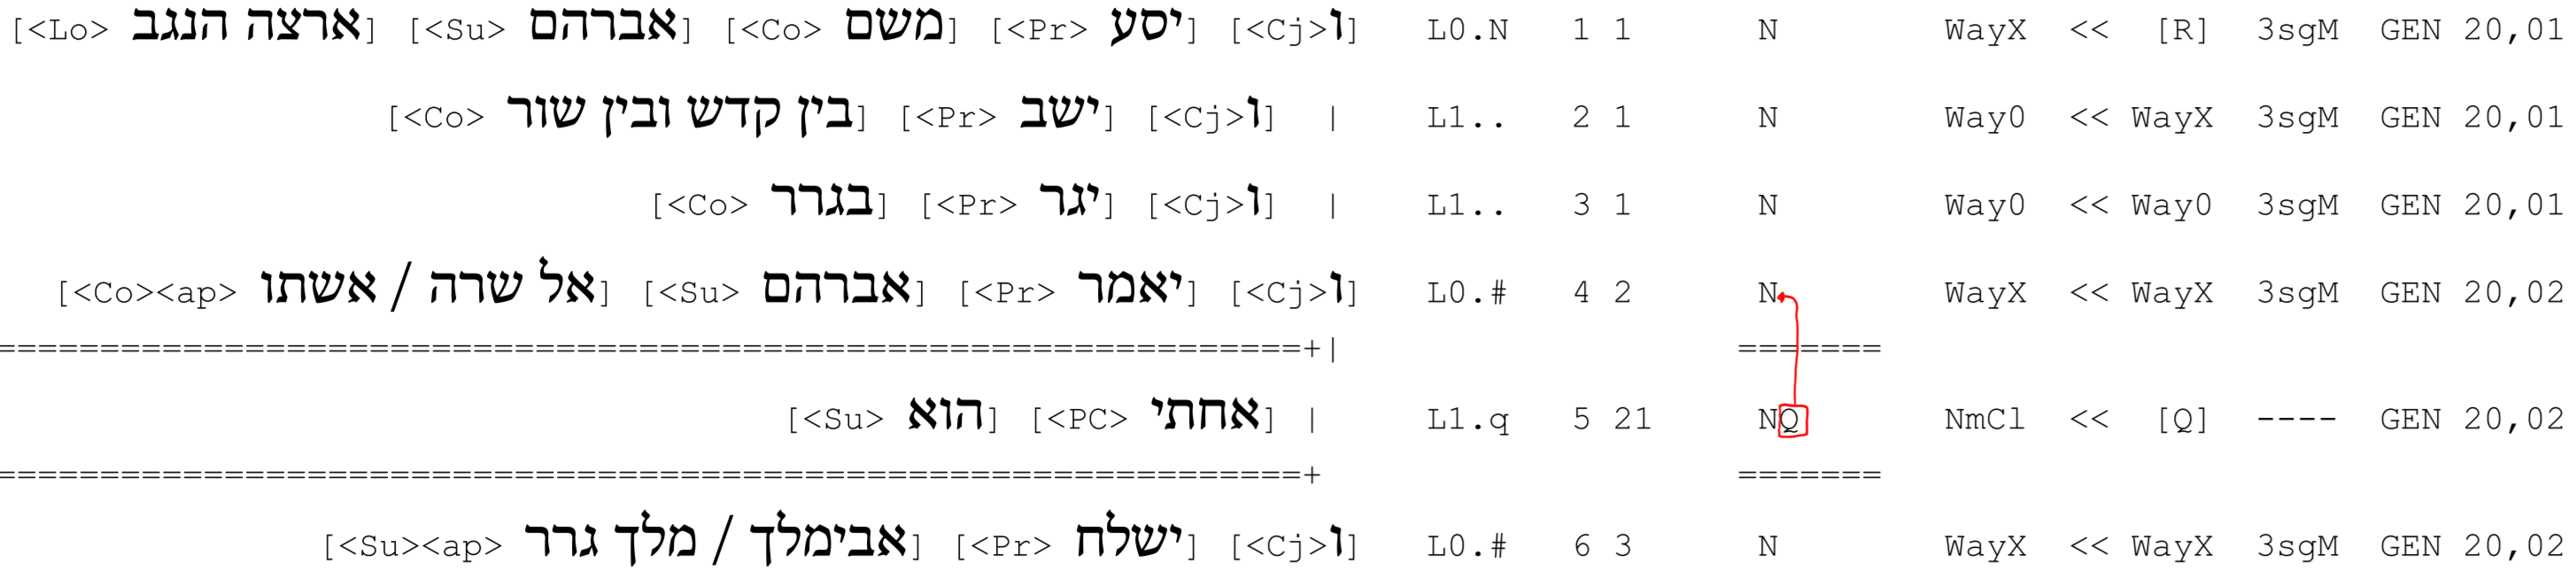





**And here the original database `CTT` file without post-production:**
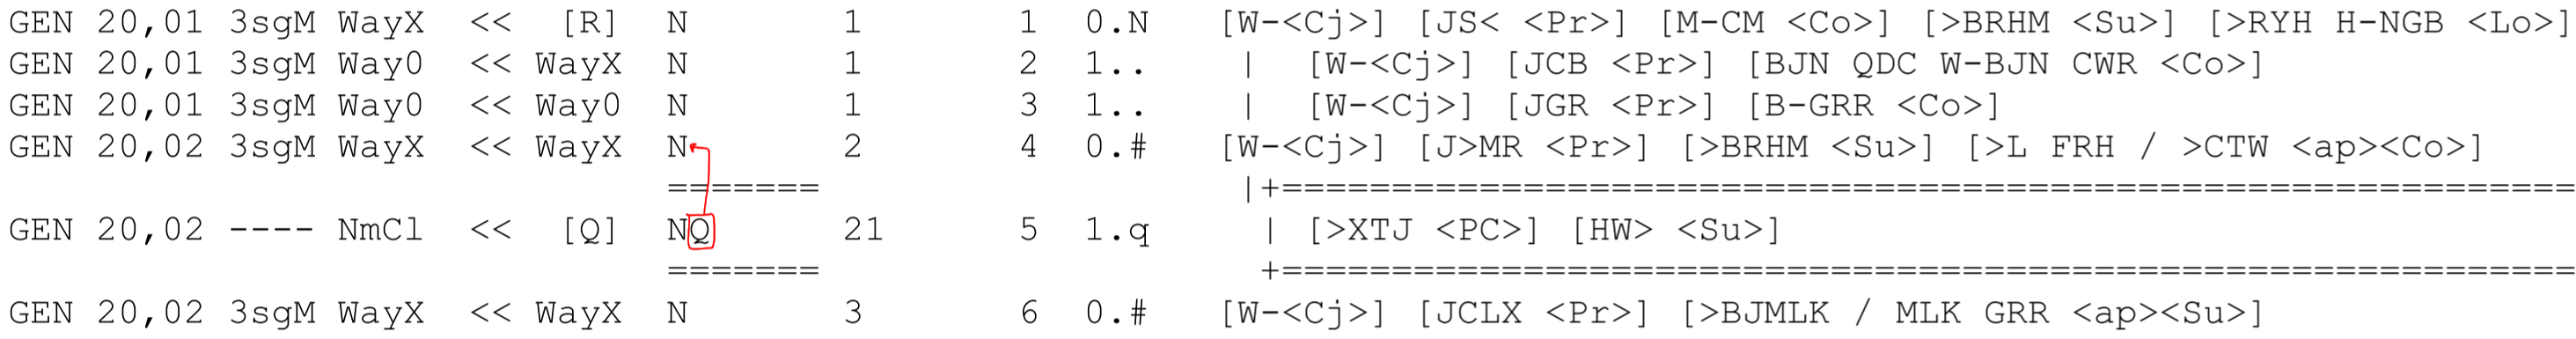





**How is this information encoded in the ETCBC database?**
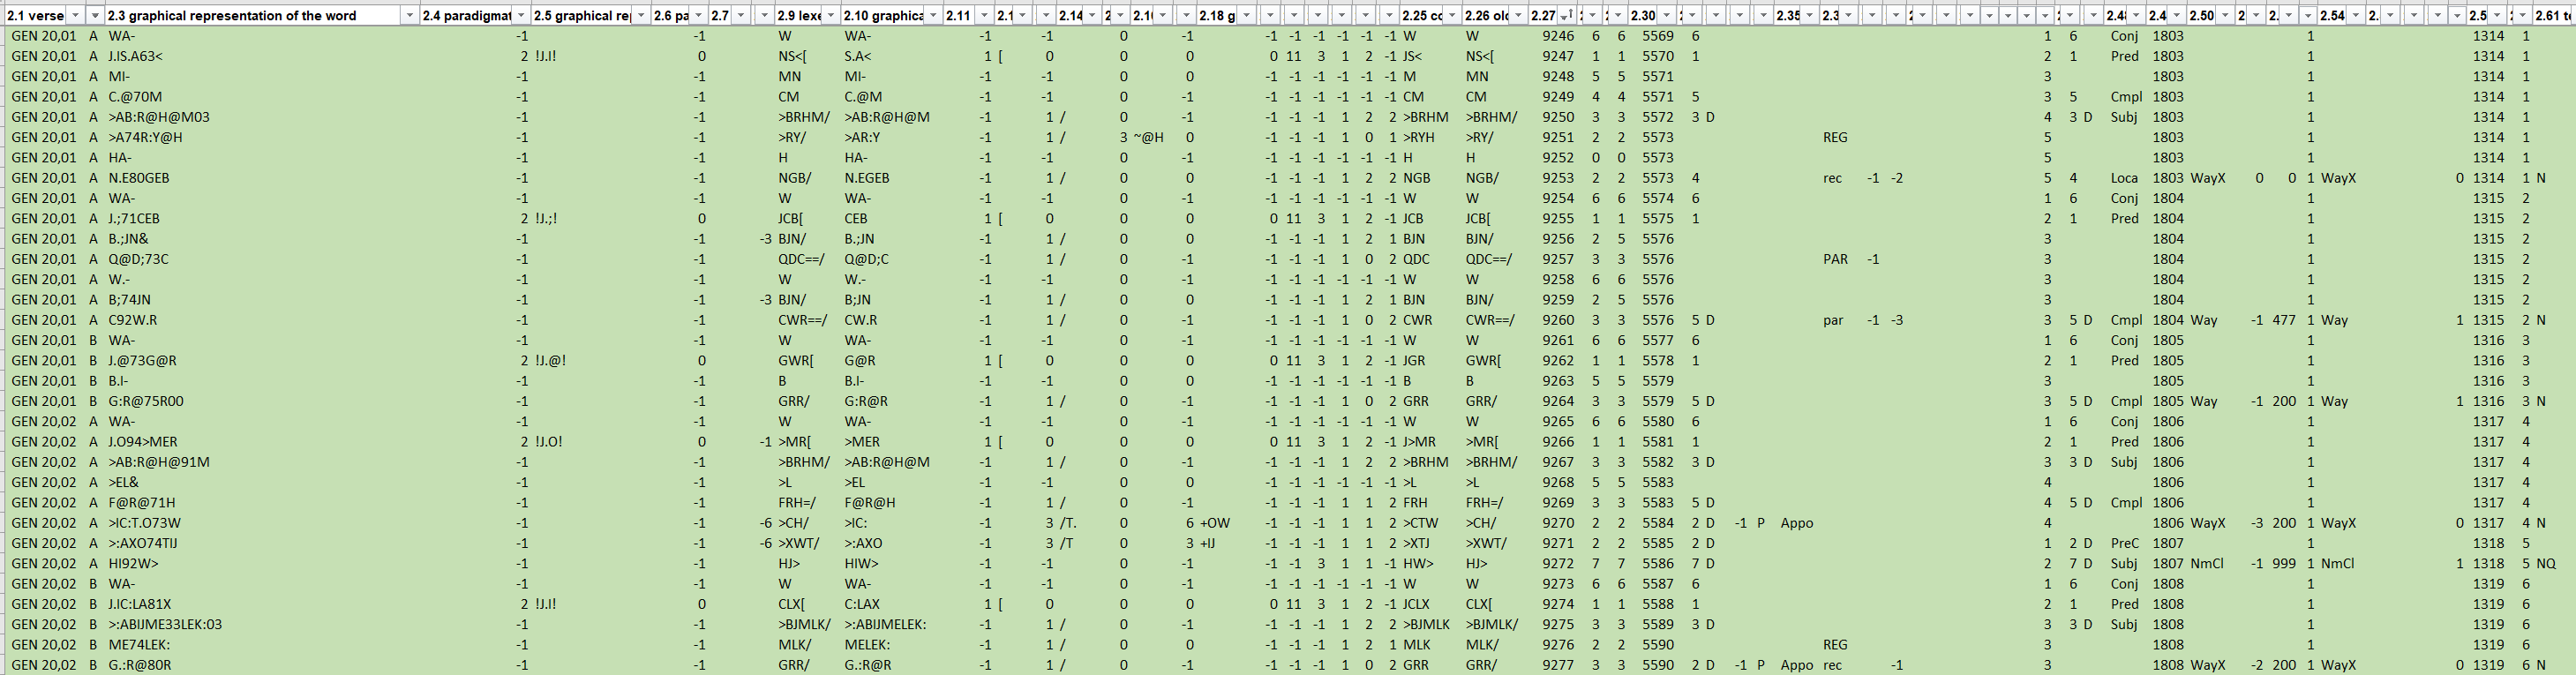

## Where are the Codes?
Now we have understood the basics of how the database is built we now need to figure out what codes/abbreviations are available for `object types` (e.g. word), for `features` (e.g. number), and for values (e.g. s, p).

A full list of features codes can be found here: https://etcbc.github.io/bhsa/features/0_home/

Check the table of contents on the right to get quick access to all linguistc levels with a desription of their `features` and `values`:
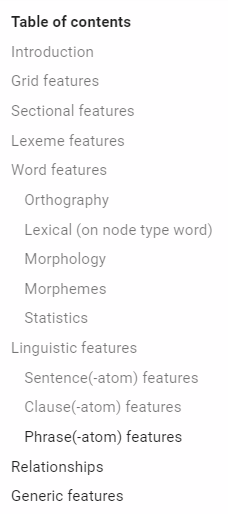


Often it is more time efficient if you just look up your codes via SHEBANQ since all features and values are hyperlinked. You can get to the codes in SHEBANQ by clicking on the verse number and select from the **legend** the codes you need for your query:
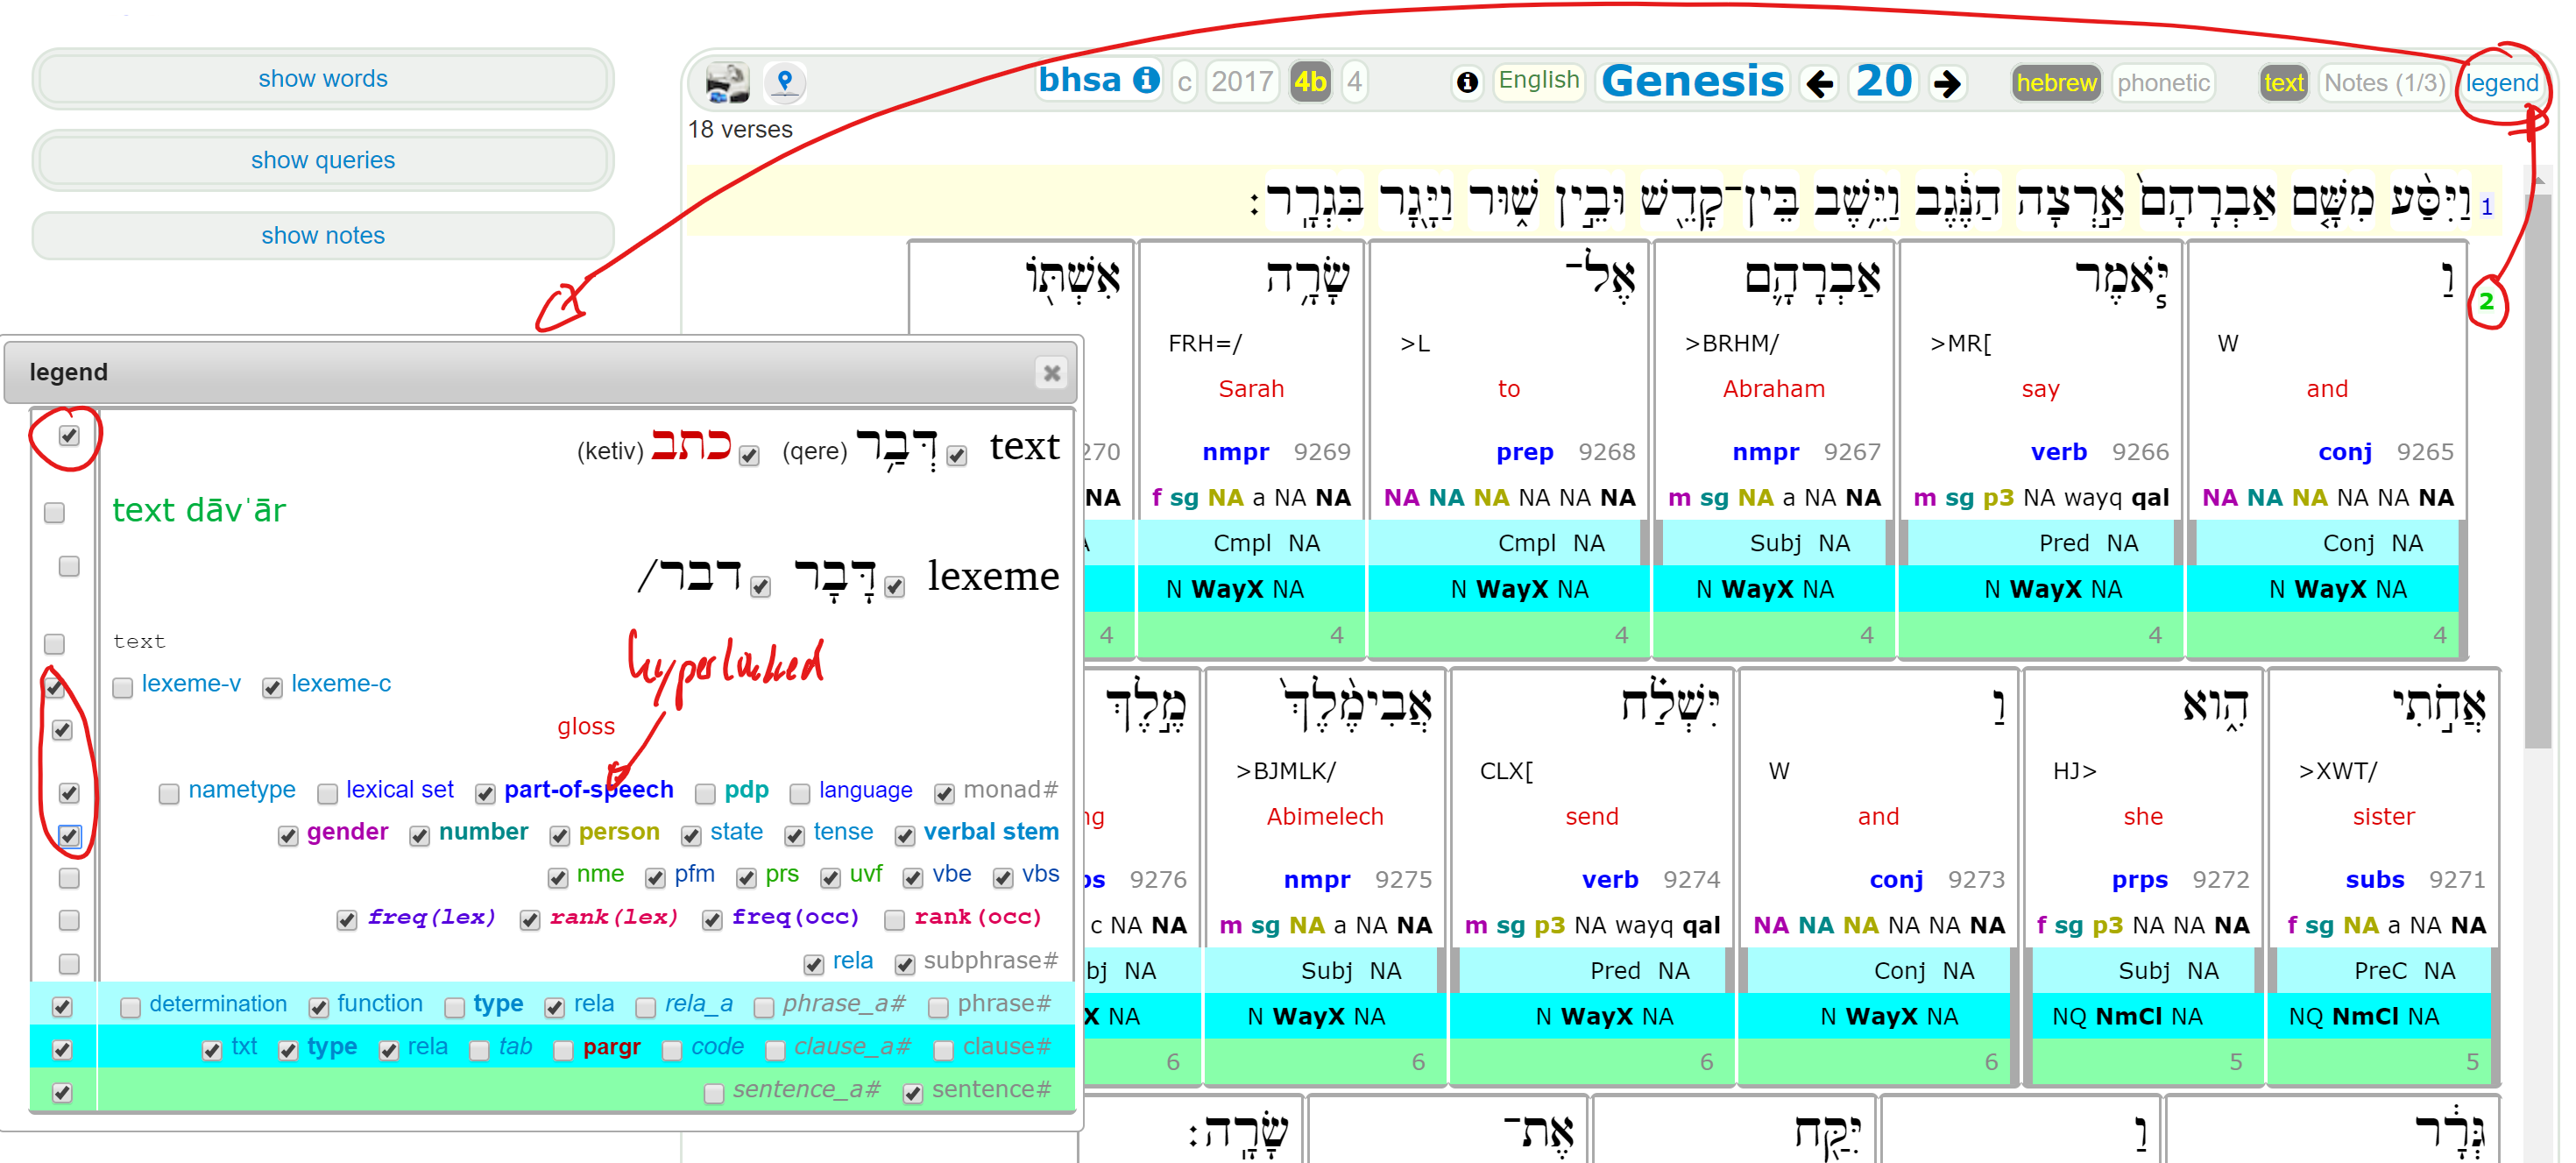

In [5]:
# Task 3
# Study the ETCBC feature doc and find all object phrases in Gen 20.
objects='''
verse book=Genesis chapter=20
 phrase function=Objc
'''
objects  = OT.search(objects)
OT.table(objects, start=1, end=2, condensed=False, colorMap={2:'red', 4:'blue'})

  0.66s 19 results


n,p,verse,phrase
1,Genesis 20:2,,אֶת־שָׂרָֽה׃
2,Genesis 20:4,,גֹ֥וי גַּם־צַדִּ֖יק


# Searching for Verbal Valence
Valence searches help you to find the meaning of words, particularly words, by studying the relatations between verbs to their complements (necessary elements). Complements are phrase that are necessary for verbs to activate a certain meaning (think of "shop" activates in "Peter runs a shop" a different meaning for "run" than "marathon" does in "Peter runs a marathon".
Lets do some valence searches for the verb LQX[ in Genesis 20:2.

Lets first have a look at the linguistc structure of Gen 20:2 in SHEBANQ:
![](https://3mqm8g.dm.files.1drv.com/y4pN6YrP0nK8ObHEmeBX_BtnWqYx-2eR6kIbz_ezE7yd_iSYXdxIm_k4PCSYDNWCFiGO57mj8ubgByErOgRDWHgZx5B1I47Wm2vFs8Hf1OdoWh9OnUh4g_QgPL_beB3Pcpzlz1ecRnr4UmQt-fuWthdgeOn5WMFGuDfhfZ2beiUdbO8A1bgitFZNw-xS3rjmU3-cdwpsj9dTA4Z2YB8WpmZKQ/Annotation%202019-06-11%20125345.png)

From this structure we can easily built our first valence sensitive query:

In [19]:
ComeInAgainstB='''
verse book=Genesis chapter=1 verse=1
 w1:word
 w2:word
 
w1 > w2
'''
odiaka  = OT.search(ComeInAgainstB)
OT.show(odiaka, start=1, end=50, condensed=False, colorMap={2: 'magenta', 3: 'cyan'})

  0.20s 55 results


In [21]:
valence1='''
clause
    phrase function=Pred
        word lex=LQX[
    phrase function=Objc
'''
valence1  = OT.search(valence1)
OT.table(valence1, start=1, end=2, condensed=False, colorMap={2:'red', 4:'blue'})

  1.07s 708 results


n,p,clause,phrase,word,phrase
1,Genesis 2:15,וַיִּקַּ֛ח יְהוָ֥ה אֱלֹהִ֖ים אֶת־הָֽאָדָ֑ם,יִּקַּ֛ח,יִּקַּ֛ח,אֶת־הָֽאָדָ֑ם
2,Genesis 2:21,וַיִּקַּ֗ח אַחַת֙ מִצַּלְעֹתָ֔יו,יִּקַּ֗ח,יִּקַּ֗ח,אַחַת֙ מִצַּלְעֹתָ֔יו


Obviously, LQX[ takes often a direct object (708 times).

But how often is that direct object a female proper name (think of Sara)?

In [22]:
h

  1.68s 24 results


n,p,clause,phrase,word,phrase,word
13,Exodus 6:20,וַיִּקַּ֨ח עַמְרָ֜ם אֶת־יֹוכֶ֤בֶד דֹּֽדָתֹו֙ לֹ֣ו לְאִשָּׁ֔ה,יִּקַּ֨ח,יִּקַּ֨ח,אֶת־יֹוכֶ֤בֶד דֹּֽדָתֹו֙,יֹוכֶ֤בֶד
14,Exodus 6:23,וַיִּקַּ֨ח אַהֲרֹ֜ן אֶת־אֱלִישֶׁ֧בַע בַּת־עַמִּינָדָ֛ב אֲחֹ֥ות נַחְשֹׁ֖ון לֹ֣ו לְאִשָּׁ֑ה,יִּקַּ֨ח,יִּקַּ֨ח,אֶת־אֱלִישֶׁ֧בַע בַּת־עַמִּינָדָ֛ב אֲחֹ֥ות נַחְשֹׁ֖ון,אֱלִישֶׁ֧בַע
15,Exodus 18:2,וַיִּקַּ֗ח יִתְרֹו֙ חֹתֵ֣ן מֹשֶׁ֔ה אֶת־צִפֹּרָ֖ה אֵ֣שֶׁת מֹשֶׁ֑ה אַחַ֖ר שִׁלּוּחֶֽיהָ׃,יִּקַּ֗ח,יִּקַּ֗ח,אֶת־צִפֹּרָ֖ה אֵ֣שֶׁת מֹשֶׁ֑ה,צִפֹּרָ֖ה
16,1_Samuel 25:43,וְאֶת־אֲחִינֹ֛עַם לָקַ֥ח דָּוִ֖ד מִֽיִּזְרְעֶ֑אל,לָקַ֥ח,לָקַ֥ח,אֶת־אֲחִינֹ֛עַם,אֲחִינֹ֛עַם
17,2_Samuel 21:8,וַיִּקַּ֣ח הַמֶּ֡לֶךְ אֶת־שְׁ֠נֵי בְּנֵ֨י רִצְפָּ֤ה בַת־אַיָּה֙ אֶת־אַרְמֹנִ֖י וְאֶת־מְפִבֹ֑שֶׁת,יִּקַּ֣ח,יִּקַּ֣ח,אֶת־שְׁ֠נֵי בְּנֵ֨י רִצְפָּ֤ה בַת־אַיָּה֙ אֶת־אַרְמֹנִ֖י וְאֶת־מְפִבֹ֑שֶׁת,רִצְפָּ֤ה
18,1_Kings 4:15,גַּם־ה֗וּא לָקַ֛ח אֶת־בָּשְׂמַ֥ת בַּת־שְׁלֹמֹ֖ה לְאִשָּֽׁה׃,לָקַ֛ח,לָקַ֛ח,אֶת־בָּשְׂמַ֥ת בַּת־שְׁלֹמֹ֖ה,בָּשְׂמַ֥ת
19,1_Kings 16:31,וַיִּקַּ֨ח אִשָּׁ֜ה אֶת־אִיזֶ֗בֶל בַּת־אֶתְבַּ֨עַל֙ מֶ֣לֶךְ צִידֹנִ֔ים,יִּקַּ֨ח,יִּקַּ֨ח,אֶת־אִיזֶ֗בֶל בַּת־אֶתְבַּ֨עַל֙ מֶ֣לֶךְ צִידֹנִ֔ים,אִיזֶ֗בֶל
20,Hosea 1:3,וַיִּקַּ֔ח אֶת־גֹּ֖מֶר בַּת־דִּבְלָ֑יִם,יִּקַּ֔ח,יִּקַּ֔ח,אֶת־גֹּ֖מֶר בַּת־דִּבְלָ֑יִם,גֹּ֖מֶר
21,Ruth 4:13,וַיִּקַּ֨ח בֹּ֤עַז אֶת־רוּת֙,יִּקַּ֨ח,יִּקַּ֨ח,אֶת־רוּת֙,רוּת֙
22,1_Chronicles 2:19,וַיִּֽקַּֽח־לֹ֤ו כָלֵב֙ אֶת־אֶפְרָ֔ת,יִּֽקַּֽח־,יִּֽקַּֽח־,אֶת־אֶפְרָ֔ת,אֶפְרָ֔ת


Interestingly, where the female proper name is the only element in the object phrase (e.g. Gen 28:9) a complement phrase with L+>CH/ follows usually (e.g. Gen 28:9, 34:4, etc.).
Lets search for those cases so that we can get a better picture of what is going on.

In [ ]:
# Task 4
# Alter the above query in such a way that you are also looking for complement phrases that contain the noun >CH/.
# What is the meaning of that construction? How would you best render this particular LQX[ valence in English?


# Assignments
Construct 2-3 syntactical queries and experiement with the database structure of the `bhsa`.

# Whats Next?: Complex Query building with Relational Operators
1. We will get to learn and understand how Relational Operators work. This will allow us to build very precise queries.
2. We will build more complex and precise queries.